# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

Before Getting Started - Need to:
-- Check the Shape of the Data
-- Look for Missing Values
-- Get a Statistical Summary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from scipy.stats import percentileofscore

## Read in Data
flight = pd.read_csv("flight.csv")

#Check Shape of Data
shape = flight.shape

#Check Missing Values
missing_values = flight.isnull().sum()

#Summary:
summary = flight.describe()

#Range:
column_ranges = {}

for column in flight.columns:
    if pd.api.types.is_numeric_dtype(flight[column]):
        column_range = flight[column].max() - flight[column].min()
        column_ranges[column] = column_range
    else:
        columnn_range = "Not applicable Data Type"


# Call all variables to read out
shape, missing_values, summary, column_ranges


((129780, 12),
 miles                     0
 passengers                0
 delay                     0
 inflight_meal             0
 inflight_entertainment    0
 inflight_wifi             0
 day_of_week               0
 redeye                    0
 weekend                   0
 coach_price               0
 firstclass_price          0
 hours                     0
 dtype: int64,
                miles     passengers          delay    coach_price  \
 count  129780.000000  129780.000000  129780.000000  129780.000000   
 mean     2006.224696     207.723155      13.162845     376.585253   
 std       943.034768      12.776363      41.941680      67.744274   
 min        12.000000     135.000000       0.000000      44.415000   
 25%      1343.000000     204.000000       9.000000     331.445000   
 50%      1986.000000     210.000000      10.000000     380.560000   
 75%      2468.000000     215.000000      13.000000     426.676250   
 max      4548.000000     244.000000    1560.000000     593.63

1) Our shape is 129780 rows x 12 columns.

2) We have no missing values so we dont have to perform any imputation before getting started.

3) Summary:
    ** See above

4) Column Ranges:
    * 'miles': 4536
    * 'passengers': 109
    * 'delay': 1560
    * 'coach_price': 549.22
    * 'firstclass_price': 907.68
    * 'hours': 7
    

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

Coach ticket prices described: 

Statistic|Value
-|-
count|129780.000000
mean|$376.585253 
std|$67.744274
min|$44.415000 
25%|$331.445000 
50%|$380.560000 
75%|$426.676250
max|$593.635000 
Range|$549.22


The distribution is left skewed (or negatively skewed) and monomodal. The mean and median values are both approximately the same, since the dataset is skewed and large we will use the median to be the "average". 

$500 is a bad price for a coach ticket as it lies in the 98th percentile of ticket prices.

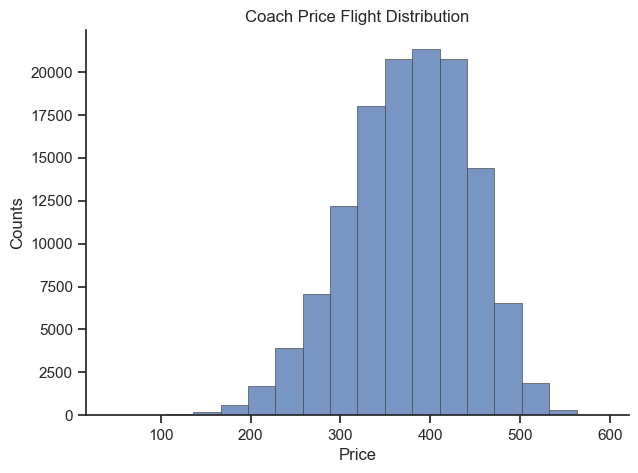

count    129780.000000
mean        376.585253
std          67.744274
min          44.415000
25%         331.445000
50%         380.560000
75%         426.676250
max         593.635000
Name: coach_price, dtype: float64
A ticket price at $500 is at the 98.075th percentile.
   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3          

<Figure size 640x480 with 0 Axes>

In [3]:
## Read in Data
flight = pd.read_csv("flight.csv")

## Task 1 Create figure:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize = (7,5))
sns.despine(f)
               
sns.histplot(data = flight,
             x=flight.coach_price,
             bins = 18,
             edgecolor="0.3",
             linewidth= 0.5)

# Format subplot:

plt.title("Coach Price Flight Distribution")
plt.xlabel("Price")
plt.ylabel("Counts")
# plt.set_xticklabels([])
plt.show()
plt.clf()

print(flight.coach_price.describe())


# Determine percentile of a $500 ticket

def find_percentile(value, distribution):
        # Sort the Distribution
        sorted_distribution = np.sort(distribution)
        
        #Find the Percentile
        percentile = percentileofscore(distribution, value)
        return percentile

given_price = 500
percentile = find_percentile(given_price, flight.coach_price)
print(f'A ticket price at ${given_price} is at the {round(percentile, 3)}th percentile.')


print(flight.head())
print(flight.dtypes)
# print(flight.info())


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

C:\Users\My Computer\AppData\Local\Temp\ipykernel_44204\1547113165.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


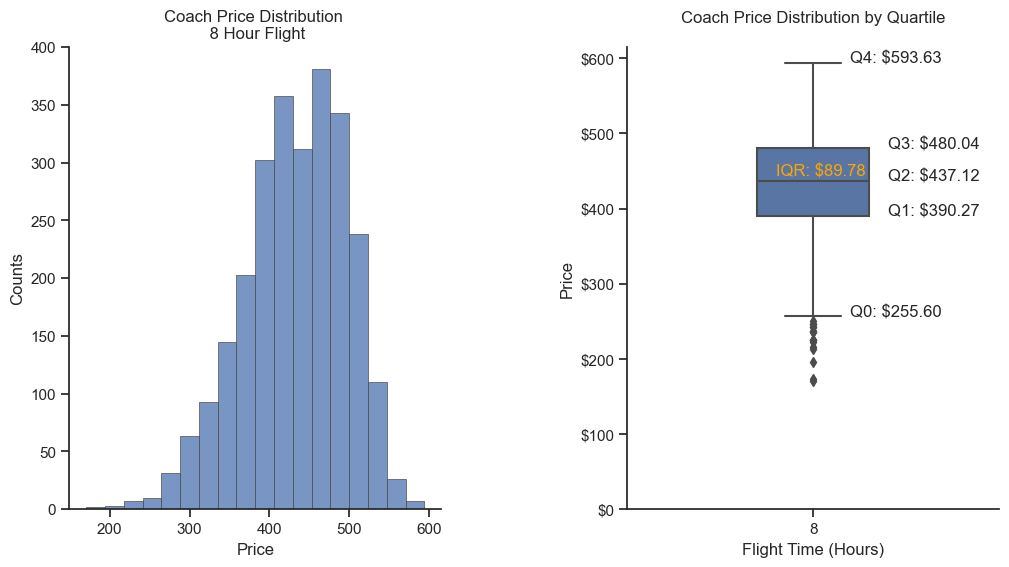

count    2634.00
mean      431.83
std        64.08
min       170.77
25%       390.27
50%       437.12
75%       480.04
max       593.64
Name: coach_price, dtype: float64
A ticket price at $500 is at the 85.573th percentile.


<Figure size 640x480 with 0 Axes>

In [4]:
## Task 2

# Create New figure
f, ax = plt.subplots(figsize = (12,6))

plt.subplot(1,2,1)
sns.despine(f)

#Set Distribution as Variable for modularity:

distribution_coach_8hr = flight.coach_price[flight.hours ==8]
    #Plot Distribution              
sns.histplot(data = flight,
             x=distribution_coach_8hr,
             bins = 18,
             edgecolor="0.3",
             linewidth= 0.5)

# Format subplot:
plt.title("Coach Price Distribution \n 8 Hour Flight")
plt.xlabel("Price")
plt.ylabel("Counts")
# plt.set_xticklabels([])


### Box Plot:

plt.subplot(1,2,2)
ax = plt.subplot(1,2,2)
sns.despine()

# Create Box Plot:
sns.boxplot(flight, x = flight.hours[flight.hours ==8], y= distribution_coach_8hr, width = 0.3) 

# Determine Quantiles:
q1 = distribution_coach_8hr.quantile(0.25)
q2 = distribution_coach_8hr.quantile(0.50)
q3 = distribution_coach_8hr.quantile(0.75)
iqr = q3-q1
q0 = q1-1.5*iqr # Lower Whisker Due to Skew
q4 = np.max(distribution_coach_8hr) # Upper Whisker Due to Skew

# Add labels for the Quantiles values
plt.text(0.10, q0, f'Q0: ${q0:.2f}')
plt.text(0.20, q1, f'Q1: ${q1:.2f}')
plt.text(0.20, q2, f'Q2: ${q2:.2f}')
plt.text(0.20, q3, f'Q3: ${q3:.2f}')
plt.text(0.10, q4, f'Q4: ${q4:.2f}')
offset = 8
plt.text(-0.1,(q3 + q1) / 2 + offset, f'IQR: ${iqr:.2f}', color = 'orange')

y_ticks = [i for i in range(0,700,100)]
#
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"${tick}"for tick in y_ticks])


plt.subplots_adjust(wspace = 0.5)
plt.title("Coach Price Distribution by Quartile", pad = 1.5, y= 1.05)
plt.xlabel("Flight Time (Hours)")
plt.ylabel("Price")
plt.show()
plt.clf()

#Print Description of Distribution:
print(round(distribution_coach_8hr.describe(),2))

given_price = 500
percentile = find_percentile(given_price, distribution_coach_8hr)
print(f'A ticket price at ${given_price} is at the {round(percentile, 3)}th percentile.')



3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [5]:
day_of_week_sorted = ['Sunday', 'Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday']

flight.delay.unique()
len(flight.delay.unique())

# x_values = range(50)
# sns.catplot(data = flight,
#             y = 'day_of_week',
#             x = 'delay',
#             jitter = True)
#plt.show()


111

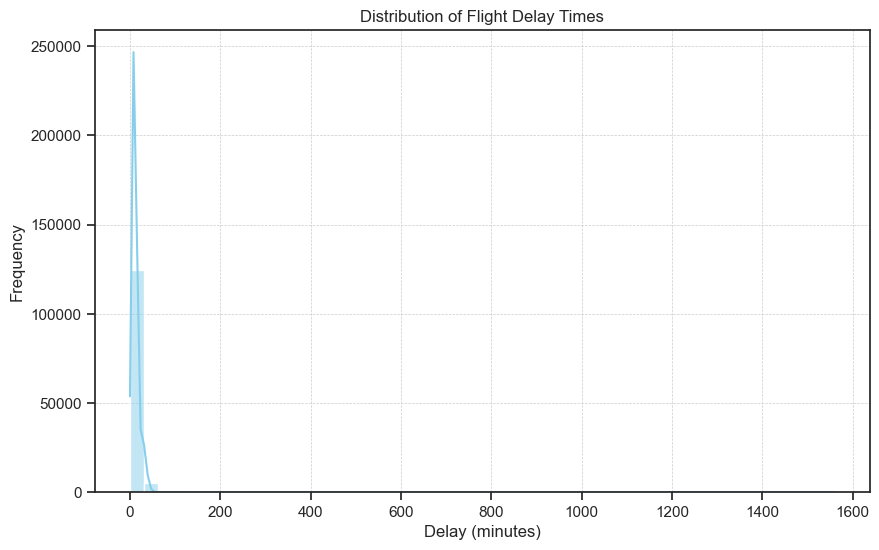

<Figure size 640x480 with 0 Axes>

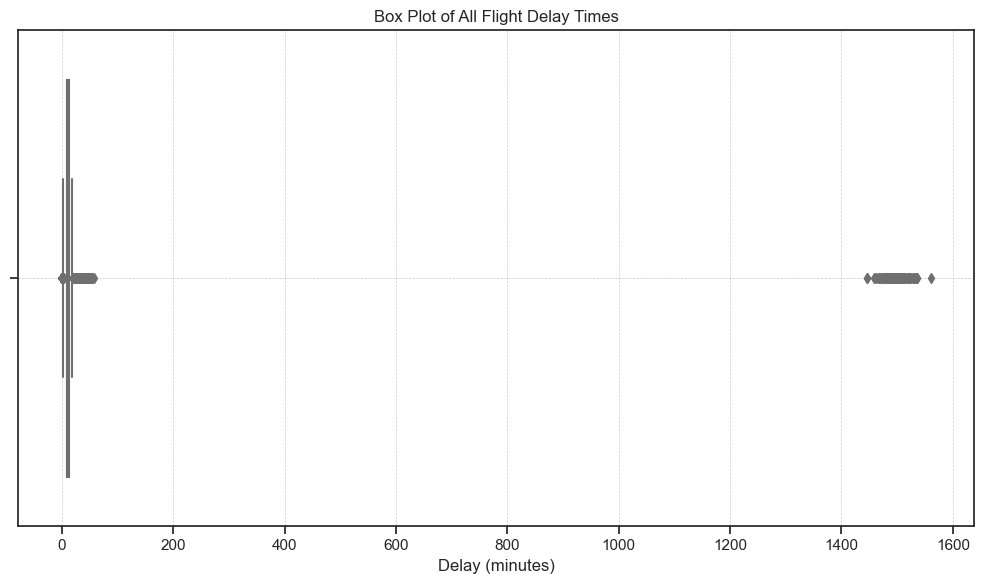

In [6]:


#Plot Histogram for delay column:
plt.figure(figsize = (10,6))
sns.histplot(flight['delay'], bins=50, color='skyblue', kde=True)

plt.title("Distribution of Flight Delay Times")
plt.xlabel("Delay (minutes)")
plt.ylabel('Frequency')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.show()
plt.clf()

plt.figure(figsize=(10, 6))
sns.boxplot(x=flight['delay'], color='skyblue')
plt.title('Box Plot of All Flight Delay Times')
plt.xlabel('Delay (minutes)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()





      All Flight Descriptive Statistics:
count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64
      

      
99% of all flights have a delay of 38.0 minutes or less.
      


      
Group 1 descriptive statistics: 
count    129680.000000
mean         12.018530
std           7.793645
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          58.000000
Name: delay, dtype: float64 

Group 2 descriptive Statistics: 
count     100.000000
mean     1497.110000
std        19.664301
min      1446.000000
25%      1487.000000
50%      1496.000000
75%      1509.000000
max      1560.000000
Name: delay, dtype: float64

    

    
ALL FLIGHT DATA:
Descriptive Statistics Summary:
    
IQR: 4.0
Lower Bound: 3.0
    
Upper Bound: 19.0
    
Outliers Count:28405
    

    
List of Outliers:
0           

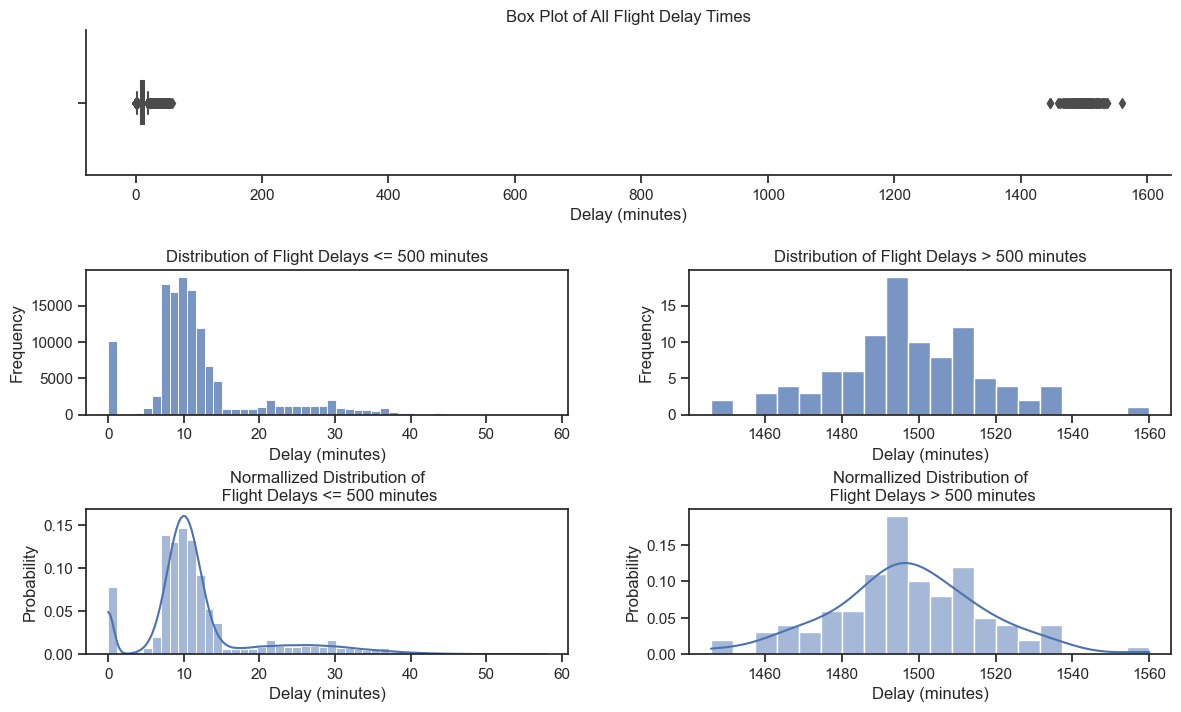

<Figure size 640x480 with 0 Axes>

In [7]:
# Segment into 2 groups
group1 = flight[flight.delay <= 500]
group2 = flight[flight.delay > 500]
delayed_flights = flight['delay'] #  All flights


# Describe the Groups
group_1_describe = group1['delay'].describe()
group_2_describe = group2['delay'].describe()
print(f"""
      All Flight Descriptive Statistics:\n{flight.delay.describe()}
      \n
      \n99% of all flights have a delay of {flight.delay.quantile(0.99)} minutes or less.
      \n\n
      """)
print(f"Group 1 descriptive statistics: \n{group_1_describe} \n")
print(f"Group 2 descriptive Statistics: \n{group_2_describe}")


#### Visualize the two different Groups ####

plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace= 0.25,
                    hspace = 0.65,
                    bottom = 0.1
                    )

# Create a Box plot of all Data. Have some outliers - starting with a boxplot to visualize outliers
plt.subplot(3,1,1)
sns.despine()

    # Create Box Plot:
dist_delay = flight['delay']
sns.boxplot(x= dist_delay, width = 0.3) 

    # Determine Quantiles:
q1 = dist_delay.quantile(0.25)
q2 = dist_delay.quantile(0.50)
q3 = dist_delay.quantile(0.75)
iqr = q3-q1
lower_bound = q1-1.5*iqr # Lower Whisker Due to Skew
upper_bound = q3+1.5*iqr # Upper Whisker Due to Skew

    # Identify Outliers
outliers = dist_delay[(dist_delay < lower_bound) |(dist_delay > upper_bound)]
low_outliers = dist_delay[(dist_delay < lower_bound)]
high_outliers = dist_delay[(dist_delay > upper_bound)]
outliers_count = outliers.count().sum()
outliers_dist = outliers.value_counts()

    # Return the calculated Values and the Outliers
print(f"""
    \n
    \nALL FLIGHT DATA:\nDescriptive Statistics Summary:
    \nIQR: {iqr}\nLower Bound: {lower_bound}
    \nUpper Bound: {upper_bound}
    \nOutliers Count:{outliers_count}
    \n
    \nList of Outliers:\n{outliers}
    \nOutliers Distribution: {outliers_dist}
      
      """)



    ### Add labels for the Quantiles values
# plt.text(0.10, lower_bound, f'Q0: {q0:.2f}')
# plt.text(0.20, q1, f'Q1: {q1:.2f}')
# plt.text(0.20, q2, f'Q2: {q2:.2f}')
# plt.text(0.20, q3, f'Q3: {q3:.2f}')
# plt.text(0.10, upper_bound, f'Q4: {q4:.2f}')
# offset = 8
# plt.text(-0.1,(q3 + q1) / 2 + offset, f'IQR: {iqr:.2f}', color = 'orange') 


    ### Box Plot Labels
plt.title("Box Plot of All Flight Delay Times")
plt.xlabel("Delay (minutes)")



    ### Group 1 Histogram
plt.subplot(3,2,3)
sns.histplot(group1.delay, bins = 50)
plt.title("Distribution of Flight Delays <= 500 minutes")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")


    ###Group 2 Histogram 
plt.subplot(3,2,4)
sns.histplot(group2.delay, bins = 20)
plt.title("Distribution of Flight Delays > 500 minutes")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")

    ### Group 1 Histogram Normallized
plt.subplot(3,2,5)
sns.histplot(group1['delay'], kde = True, stat='probability', bins = 50)
plt.title("Normallized Distribution of\n Flight Delays <= 500 minutes")
plt.xlabel("Delay (minutes)")
plt.ylabel("Probability")


    ###Group 2 Histogram  Normallized 
plt.subplot(3,2,6)
sns.histplot(x = group2.delay, kde = True, stat='probability',bins = 20)
plt.title("Normallized Distribution of\n Flight Delays > 500 minutes")
plt.xlabel("Delay (minutes)")
plt.ylabel("Probability")

plt.show()
plt.clf()

If you are afraid of finding yourself late for a connecting flight, based on the data you should expect to find yourself with less than a 38 minute delay (with 99% probability).

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

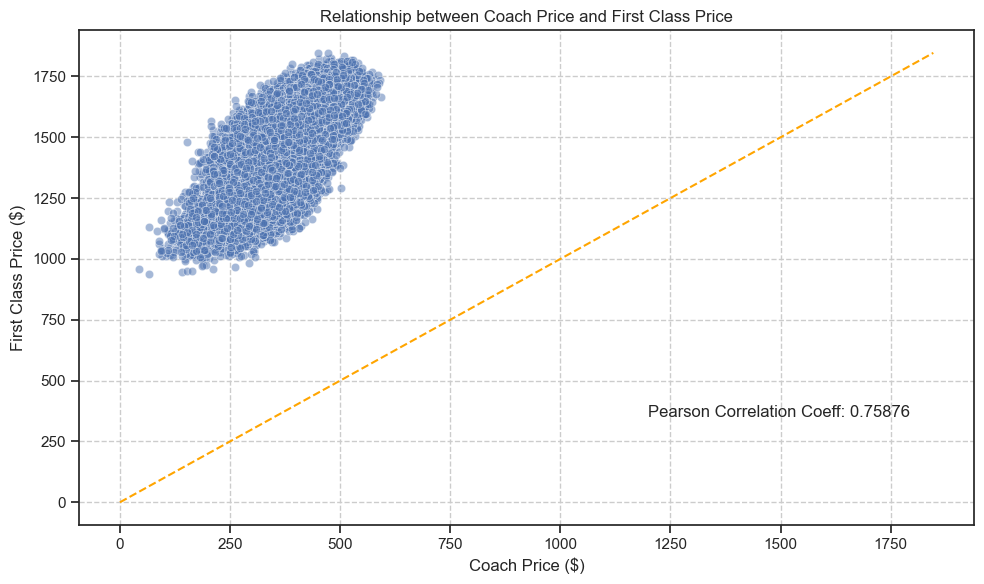

<Figure size 640x480 with 0 Axes>

In [8]:
## Task 4
    # Plot first class price against coach price.
plt.figure(figsize = (10,6))
sns.scatterplot(flight, x = 'coach_price', y = 'firstclass_price', alpha = 0.5)

    # Determine Line of Equality
max_limit = max(flight.coach_price.max(), flight.firstclass_price.max())

    #Plot Line of Equality
plt.plot([0,max_limit],[0,max_limit], color = 'orange', linestyle = '--')

    #Determine correlation coefficient
correlation = flight.coach_price.corr(flight.firstclass_price)

    #Labels
plt.title('Relationship between Coach Price and First Class Price')
plt.xlabel('Coach Price ($)')
plt.ylabel('First Class Price ($)')
plt.text(1200,350,f"Pearson Correlation Coeff: {round(correlation,5)}")
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()
plt.clf()

    #Determine correlation coefficient
correlation = flight.coach_price.corr(flight.firstclass_price)



Since all of our data is above our line of equality we can conclude that at no point the first class price is less than the coach price. 

We also see a strong positive Pearson Correlation = 0.75 suggesting there is a positive relationship between increasing Coach Price and First Class Price

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

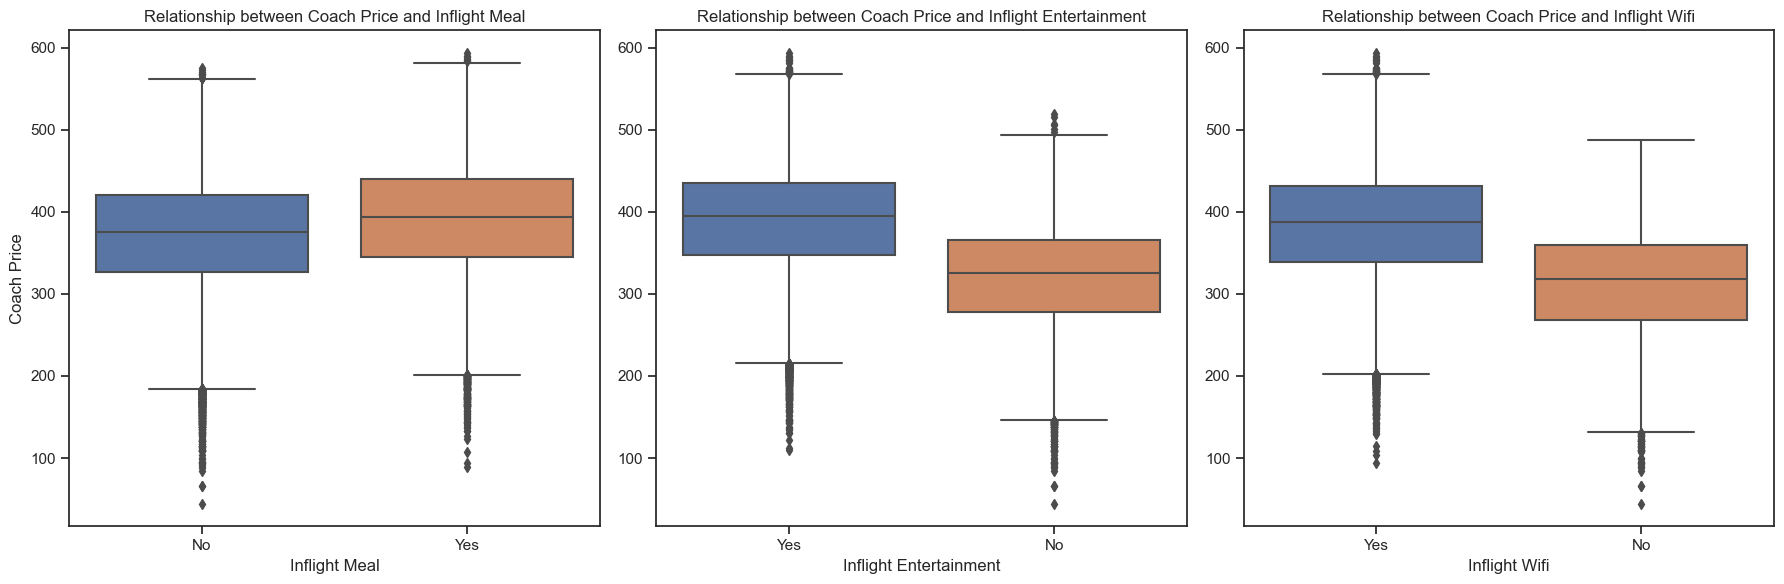

<Figure size 640x480 with 0 Axes>

In [9]:
## Task 5

f, axes = plt.subplots(nrows=1, ncols = 3, figsize = (18,6))

features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

for i,feature in enumerate(features):
    sns.boxplot(x = flight[feature], y = flight['coach_price'], ax = axes[i])
    axes[i].set_title(f'Relationship between Coach Price and {feature.replace("_"," ").title()}')
    axes[i].set_xlabel(f'{feature.replace("_"," ").title()}')
    axes[i].set_ylabel("Coach Price" if i == 0 else '')
plt.tight_layout()
plt.show()
plt.clf()


C:\Users\My Computer\AppData\Local\Temp\ipykernel_44204\1396128374.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_y_labels)


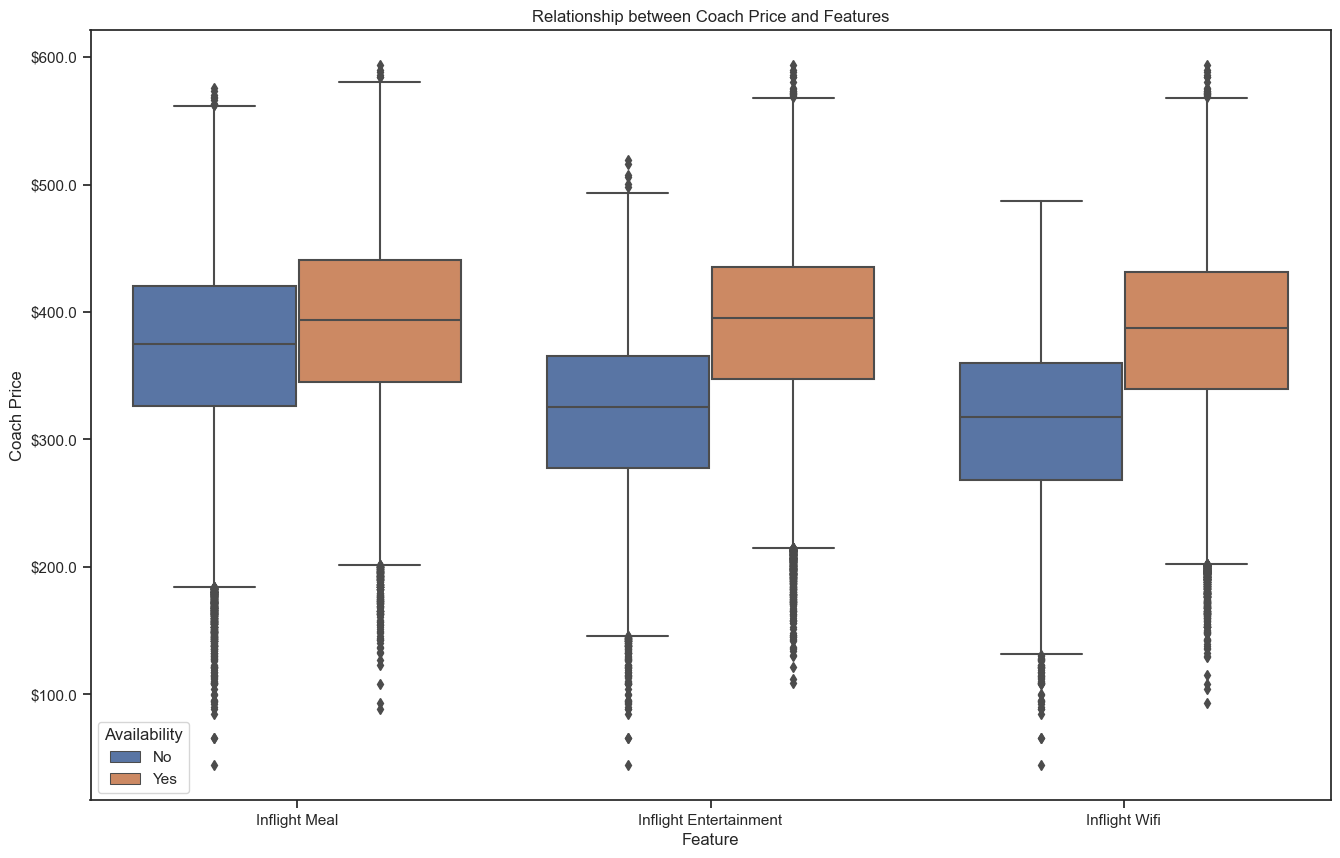

<Figure size 640x480 with 0 Axes>

In [10]:

features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']
melted_data = pd.melt(flight, id_vars= 'coach_price', value_vars = features, var_name = 'Feature', value_name = 'Availability')
fig, ax = plt.subplots(figsize =( 16, 10))

sns.boxplot(data=melted_data, x='Feature', y='coach_price', hue='Availability')
formatted_x_labels = [feature.replace("_", " ").title() for feature in features]
ax.set_xticklabels(formatted_x_labels)

plt.title("Relationship between Coach Price and Features")
formatted_y_labels = ["$" + str(label) for label in ax.get_yticks()]
ax.set_yticklabels(formatted_y_labels)
plt.ylabel("Coach Price")
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

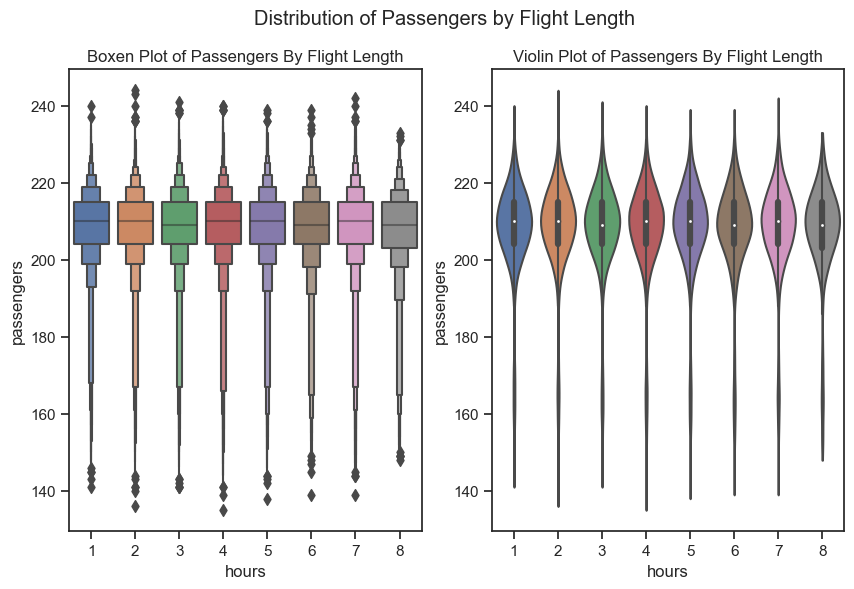

<Figure size 640x480 with 0 Axes>

In [11]:
## Task 6
fig, axes = plt.subplots(1,2, figsize= (10,6))

sns.boxenplot(data = flight, x= 'hours', y = 'passengers', ax= axes[0])
sns.violinplot(data = flight, x = 'hours', y = 'passengers',ax = axes[1], cut = 0,bw_adjust = 0.5)

axes[0].set_title("Boxen Plot of Passengers By Flight Length")
axes[1].set_title("Violin Plot of Passengers By Flight Length")
plt.suptitle("Distribution of Passengers by Flight Length")
plt.show()
plt.clf()


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

C:\Users\My Computer\AppData\Local\Temp\ipykernel_44204\4031589574.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_y_labels)


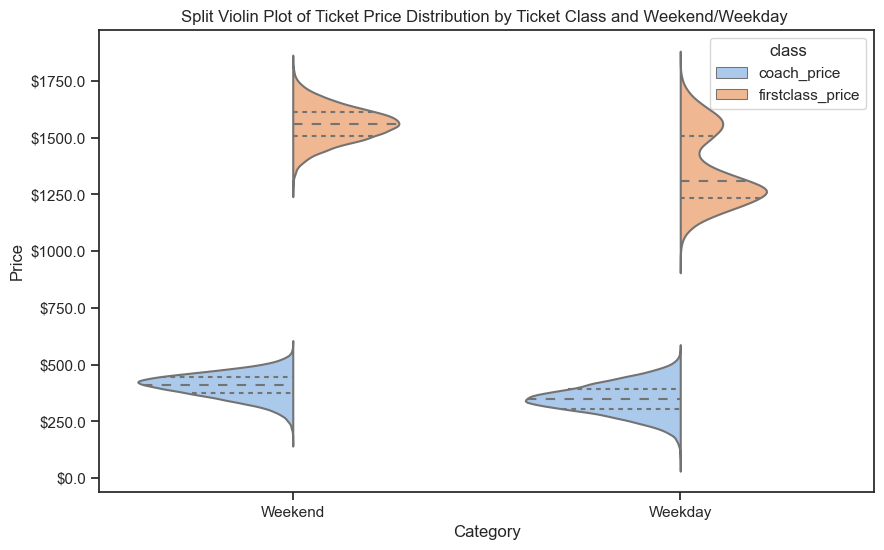

<Figure size 640x480 with 0 Axes>

In [35]:
## Task 7



#Make Day Catagories (weekday/weekends)
weekday_days = []
weekend_days = []

for day in day_of_week_sorted:
    if day == 'Saturday' or day == 'Sunday':
        weekend_days.append(day)
    else:
        weekday_days.append(day)


fig, ax = plt.subplots(figsize = (10,6))
flight['week_category'] = flight.day_of_week.apply(lambda x: 'Weekend' if x in weekend_days else 'Weekday')

weekend_flights_df = flight[flight['week_category'] == 'Weekend']
weekday_flights_df = flight[flight['week_category'] == 'Weekday']

# Reshape data:
melted_prices = flight.melt(id_vars='week_category',
                            value_vars=['coach_price', 'firstclass_price'],
                            var_name='class',
                            value_name = 'Price')
                            
                                        
sns.violinplot(melted_prices, x = 'week_category', y = 'Price', 
               inner = 'quartile',
               hue = 'class', 
               split = True,
               palette = 'pastel',
               dodge = True
               )
formatted_y_labels = ["$" + str(label) for label in ax.get_yticks()]
ax.set_yticklabels(formatted_y_labels)
plt.subplots_adjust()
plt.xlabel("Category")
plt.title("Split Violin Plot of Ticket Price Distribution by Ticket Class and Weekend/Weekday ")

plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

C:\Users\My Computer\AppData\Local\Temp\ipykernel_44204\1446277228.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_y_labels)


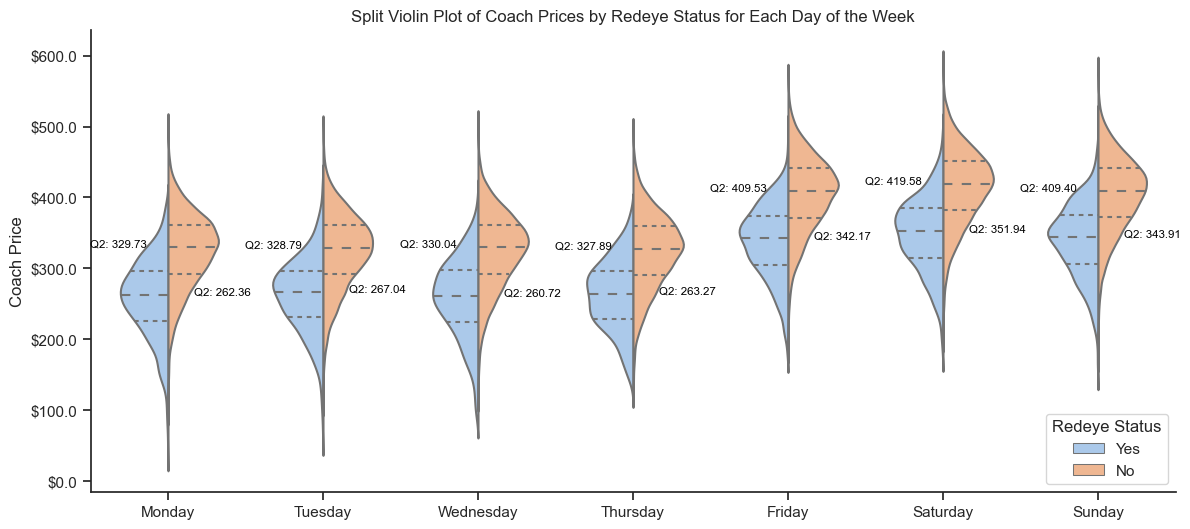

In [100]:
## Task 8

days_of_week_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize = (14,6))
sns.violinplot(flight, x = flight.day_of_week, y = 'coach_price', 
               order = days_of_week_ordered,
               split = True, 
               hue = 'redeye', 
               inner = 'quartile', 
               palette = 'pastel',
               width= 0.65)

quartiles = flight.groupby(['day_of_week', 'redeye'])['coach_price'].quantile([0.25, 0.50, 0.75]).unstack()
quartiles.reset_index(inplace = True)


formatted_y_labels = ["$" + str(label) for label in ax.get_yticks()]
ax.set_yticklabels(formatted_y_labels)

plt.legend(title = 'Redeye Status', loc = 4)
sns.despine()
plt.ylabel('Coach Price')
plt.xlabel(None)
plt.title("Split Violin Plot of Coach Prices by Redeye Status for Each Day of the Week")


for idx, day in enumerate(days_of_week_ordered):
    for j, redeye_value in enumerate(flight['redeye'].unique()):
        # Calculate the horizontal offset based on the redeye value
        offset = -0.32 if redeye_value == 'No' else 0.35
        
        # Fetch the quartile values
        #Q1 = quartiles.loc[(quartiles['day_of_week'] == day) & (quartiles['redeye'] == redeye_value), 0.25].values[0]
        Q2 = quartiles.loc[(quartiles['day_of_week'] == day) & (quartiles['redeye'] == redeye_value), 0.50].values[0]
        #Q3 = quartiles.loc[(quartiles['day_of_week'] == day) & (quartiles['redeye'] == redeye_value), 0.75].values[0]
        
        # Annotate the quartile values
        #ax.text(idx + offset, Q1, f"Q1: {Q1:.2f}", horizontalalignment='center', size='x-small', color='black')
        ax.text(idx + offset, Q2, f"Q2: {Q2:.2f}", horizontalalignment='center', size='x-small', color='black')
        #ax.text(idx + offset, Q3, f"Q3: {Q3:.2f}", horizontalalignment='center', size='x-small', color='black')
        


